# Project 03

## Titanic Data Set - Machine Learning Module 03

Nathan Sloss 11/7/2023

This project will explore three different Machine Learning models:

Decision Tree Classifier (DT) - A Decision Tree splits data into smaller groups based on decision rules (like "is height greater than 150 cm?"). It’s like a flowchart, where each decision point leads to another question until a final classification is reached. Easy to interpret and fast to train, but can overfit if the tree becomes too complex.

Support Vector Machine (SVM) - A Support Vector Machine tries to find the "best boundary" (a hyperplane) that separates data into classes. It works well with complex data and small datasets. Effective when there is a clear margin of separation between classes, but can be computationally expensive for large datasets.

Neural Network (NN) - A Neural Network is inspired by how human brains process information. It consists of layers of interconnected "neurons" that process input data and adjust based on feedback. It can handle complex patterns and non-linear relationships, but needs more data and tuning to avoid overfitting.

## Section 1  Import and Inspect the Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix




In [2]:
# Load Titanic dataset
titanic = sns.load_dataset('titanic')
# Display a few records to verify
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [3]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Section 2 Data Exploration and Preparation

### 2.1 Handle Missing Values and Clean data

In [4]:
median_age = titanic['age'].median()
titanic['age'] = titanic['age'].fillna(median_age)

mode_embark = titanic['embark_town'].mode()[0]
titanic['embark_town'] = titanic['embark_town'].fillna(mode_embark)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
print(titanic.corr(numeric_only=True))

            survived    pclass       age     sibsp     parch      fare  \
survived    1.000000 -0.338481 -0.064910 -0.035322  0.081629  0.257307   
pclass     -0.338481  1.000000 -0.339898  0.083081  0.018443 -0.549500   
age        -0.064910 -0.339898  1.000000 -0.233296 -0.172482  0.096688   
sibsp      -0.035322  0.083081 -0.233296  1.000000  0.414838  0.159651   
parch       0.081629  0.018443 -0.172482  0.414838  1.000000  0.216225   
fare        0.257307 -0.549500  0.096688  0.159651  0.216225  1.000000   
adult_male -0.557080  0.094035  0.247704 -0.253586 -0.349943 -0.182024   
alone      -0.203367  0.135207  0.171647 -0.584471 -0.583398 -0.271832   

            adult_male     alone  
survived     -0.557080 -0.203367  
pclass        0.094035  0.135207  
age           0.247704  0.171647  
sibsp        -0.253586 -0.584471  
parch        -0.349943 -0.583398  
fare         -0.182024 -0.271832  
adult_male    1.000000  0.404744  
alone         0.404744  1.000000  


### 2.2 Feature Engineering

In [6]:
# Create new feature
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

# Map categories to numeric values
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['embarked'] = titanic['embarked'].map({'C': 0, 'Q': 1, 'S': 2})
titanic['alone'] = titanic['alone'].astype(int)

## Section 3 Feature Selection and Justification

### 3.1 Choose Features and target 

Case 1: 

input features: alone <br>
target: survived

Case 2:

input features - age<br>
target: survived

Case 3:

input features -  age and family_size <br>
target: survived

### 3.2 Define X features and Y target

In [7]:
# Case 1: Feature = alone

# Select the feature 'alone' as input
X1 = titanic[['alone']]

# Select 'survived' as the target for the same rows
y1 = titanic['survived']

In [8]:
# Case 2: Feature = age (drop if na or not available)

# Select the feature 'age', but drop rows where age is missing
X2 = titanic[['age']].dropna()

# Select the matching 'survived' values using the same index
y2 = titanic.loc[X2.index, 'survived']

In [9]:
# Case 3: Features = Age + Family Size (drop if na or not available)

# Select both 'age' and 'family_size', and drop rows where missing (na)
X3 = titanic[['age', 'family_size']].dropna()

# Select the corresponding 'survived' values for those rows
y3 = titanic.loc[X3.index, 'survived']

### Reflection 3 

Why are these features selected? <br>

It can be assumed that a persons age would have a determining factor on whether they survived the titanic wreck.  <br>

Are there features that are likely to be highly predictive of survival?<br>

According to the correlation matrix earlier, the fare and the pclass have the highest correlation to survivorship.

## Section 4  Train a Classification Model (Decision Tree)


### 4.1 Split the Data


In [10]:
from sklearn.model_selection import StratifiedShuffleSplit

In [11]:
# Case 1: Feature = alone
splitter1 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
for train_idx1, test_idx1 in splitter1.split(X1, y1):

    X1_train = X1.iloc[train_idx1]
    X1_test  = X1.iloc[test_idx1]
    y1_train = y1.iloc[train_idx1]
    y1_test  = y1.iloc[test_idx1]

print('Case 1 - Alone:')
print('Train size:', len(X1_train), '| Test size:', len(X1_test))

Case 1 - Alone:
Train size: 712 | Test size: 179


In [12]:
# Case 2: Feature = age
splitter2 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
for train_idx2, test_idx2 in splitter2.split(X2, y2):
    X2_train = X2.iloc[train_idx2]
    X2_test  = X2.iloc[test_idx2]
    y2_train = y2.iloc[train_idx2]
    y2_test  = y2.iloc[test_idx2]

print('Case 2 - Age:')
print('Train size:', len(X2_train), '| Test size:', len(X2_test))

Case 2 - Age:
Train size: 712 | Test size: 179


In [13]:
# Case 3: Features = age + family_size
splitter3 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
for train_idx3, test_idx3 in splitter3.split(X3, y3):
    X3_train = X3.iloc[train_idx3]
    X3_test  = X3.iloc[test_idx3]
    y3_train = y3.iloc[train_idx3]
    y3_test  = y3.iloc[test_idx3]

print('Case 3 - Age + Family Size:')
print('Train size:', len(X3_train), '| Test size:', len(X3_test))

Case 3 - Age + Family Size:
Train size: 712 | Test size: 179


### 4.2 Create and Train a Model (Decision Tree)

In [14]:
# CASE 1: Decision Tree using alone
tree_model1 = DecisionTreeClassifier()
tree_model1.fit(X1_train, y1_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [15]:
# CASE 2: Decision Tree using age
tree_model2 = DecisionTreeClassifier()
tree_model2.fit(X2_train, y2_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [16]:
# CASE 3: Decision Tree using age and family_size
tree_model3 = DecisionTreeClassifier()
tree_model3.fit(X3_train, y3_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### 4.3 Predict and Evaluate Model Performance

In [17]:
# Predict on training data
y1_pred = tree_model1.predict(X1_train)
print("Results for Decision Tree on training data (Case 1 - alone):")
print(classification_report(y1_train, y1_pred))

# Predict on test data
y1_test_pred = tree_model1.predict(X1_test)
print("Results for Decision Tree on test data (Case 1 - alone):")
print(classification_report(y1_test, y1_test_pred))

Results for Decision Tree on training data (Case 1 - alone):
              precision    recall  f1-score   support

           0       0.69      0.69      0.69       439
           1       0.50      0.51      0.51       273

    accuracy                           0.62       712
   macro avg       0.60      0.60      0.60       712
weighted avg       0.62      0.62      0.62       712

Results for Decision Tree on test data (Case 1 - alone):
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       110
           1       0.51      0.58      0.54        69

    accuracy                           0.63       179
   macro avg       0.61      0.62      0.61       179
weighted avg       0.64      0.63      0.63       179



In [18]:
# Predict on training data
y2_pred = tree_model2.predict(X2_train)
print("Results for Decision Tree on training data (Case 2 - age):")
print(classification_report(y2_train, y2_pred))

# Predict on test data
y2_test_pred = tree_model2.predict(X2_test)
print("Results for Decision Tree on test data (Case 2 - age):")
print(classification_report(y2_test, y2_test_pred))

Results for Decision Tree on training data (Case 2 - age):
              precision    recall  f1-score   support

           0       0.68      0.92      0.78       439
           1       0.69      0.29      0.41       273

    accuracy                           0.68       712
   macro avg       0.68      0.61      0.60       712
weighted avg       0.68      0.68      0.64       712

Results for Decision Tree on test data (Case 2 - age):
              precision    recall  f1-score   support

           0       0.63      0.89      0.74       110
           1       0.50      0.17      0.26        69

    accuracy                           0.61       179
   macro avg       0.57      0.53      0.50       179
weighted avg       0.58      0.61      0.55       179



In [19]:
# Predict on training data
y3_pred = tree_model3.predict(X3_train)
print("Results for Decision Tree on training data (Case 3 - age + family_size):")
print(classification_report(y3_train, y3_pred))

# Predict on test data
y3_test_pred = tree_model3.predict(X3_test)
print("Results for Decision Tree on test data (Case 3 - age + family_size):")
print(classification_report(y3_test, y3_test_pred))

Results for Decision Tree on training data (Case 3 - age + family_size):
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       439
           1       0.77      0.56      0.65       273

    accuracy                           0.77       712
   macro avg       0.77      0.73      0.74       712
weighted avg       0.77      0.77      0.76       712

Results for Decision Tree on test data (Case 3 - age + family_size):
              precision    recall  f1-score   support

           0       0.65      0.75      0.69       110
           1       0.46      0.35      0.40        69

    accuracy                           0.59       179
   macro avg       0.55      0.55      0.54       179
weighted avg       0.57      0.59      0.58       179



### 4.4 Report Confusion Matrix as Heatmap

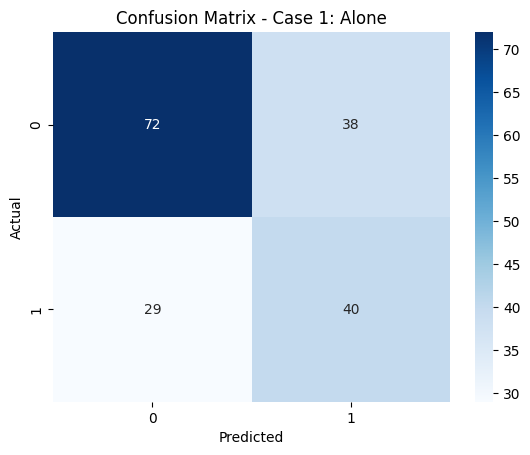

In [20]:
# Create confusion matrix for test predictions (Case 1)
cm1 = confusion_matrix(y1_test, y1_test_pred)

# Plot heatmap
sns.heatmap(cm1, annot=True, cmap='Blues')
plt.title('Confusion Matrix - Case 1: Alone')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

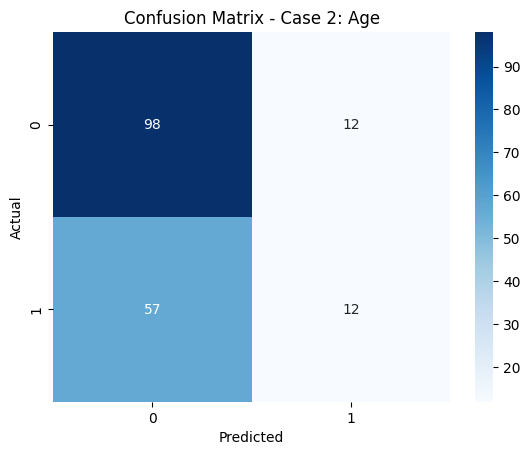

In [21]:
# Create confusion matrix for test predictions (Case 2)
cm2 = confusion_matrix(y2_test, y2_test_pred)

# Plot heatmap
sns.heatmap(cm2, annot=True, cmap='Blues')
plt.title('Confusion Matrix - Case 2: Age')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

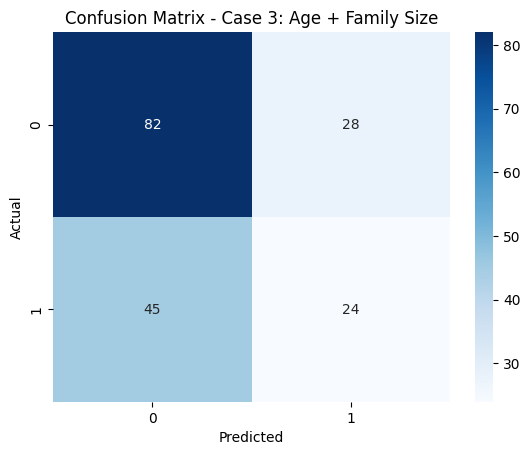

In [22]:
# Create confusion matrix for test predictions (Case 3)
cm3 = confusion_matrix(y3_test, y3_test_pred)

# Plot heatmap
sns.heatmap(cm3, annot=True, cmap='Blues')
plt.title('Confusion Matrix - Case 3: Age + Family Size')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Report Decision Tree Plot

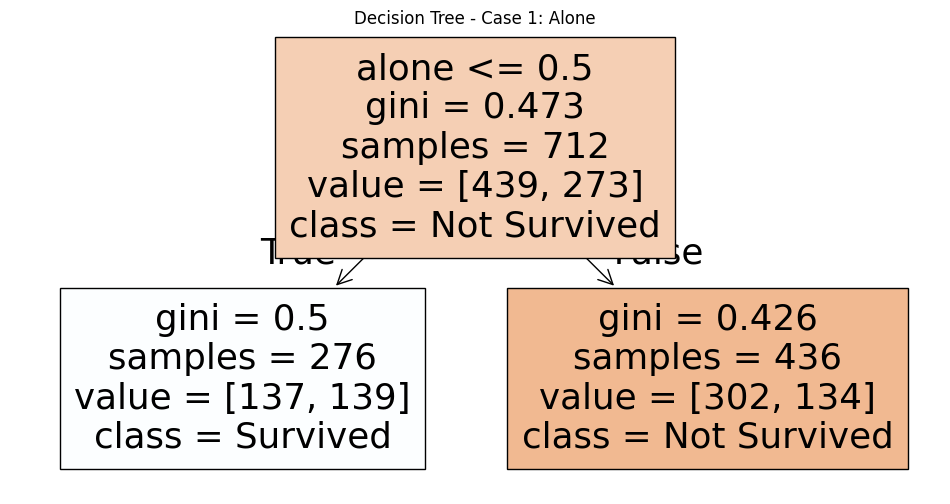

In [23]:
# Plot Decision Tree for Case 1
fig = plt.figure(figsize=(12, 6))
plot_tree(tree_model1,
          feature_names=X1.columns,
          class_names=['Not Survived', 'Survived'],
          filled=True)
plt.title("Decision Tree - Case 1: Alone")
plt.show()

# Save image
fig.savefig("tree_case1_alone.png")

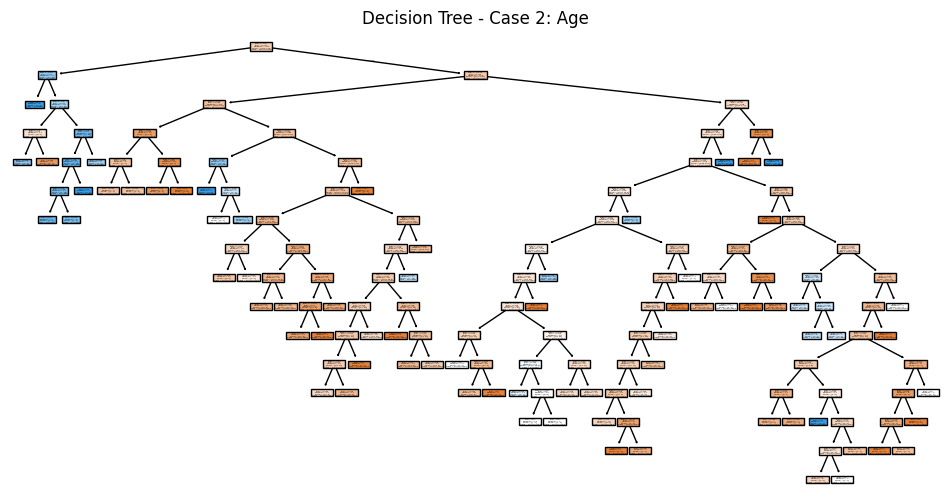

In [24]:
# Plot Decision Tree for Case 2
fig = plt.figure(figsize=(12, 6))
plot_tree(tree_model2,
          feature_names=X2.columns,
          class_names=['Not Survived', 'Survived'],
          filled=True)
plt.title("Decision Tree - Case 2: Age")
plt.show()

# Save image
fig.savefig("tree_case2_age.png")

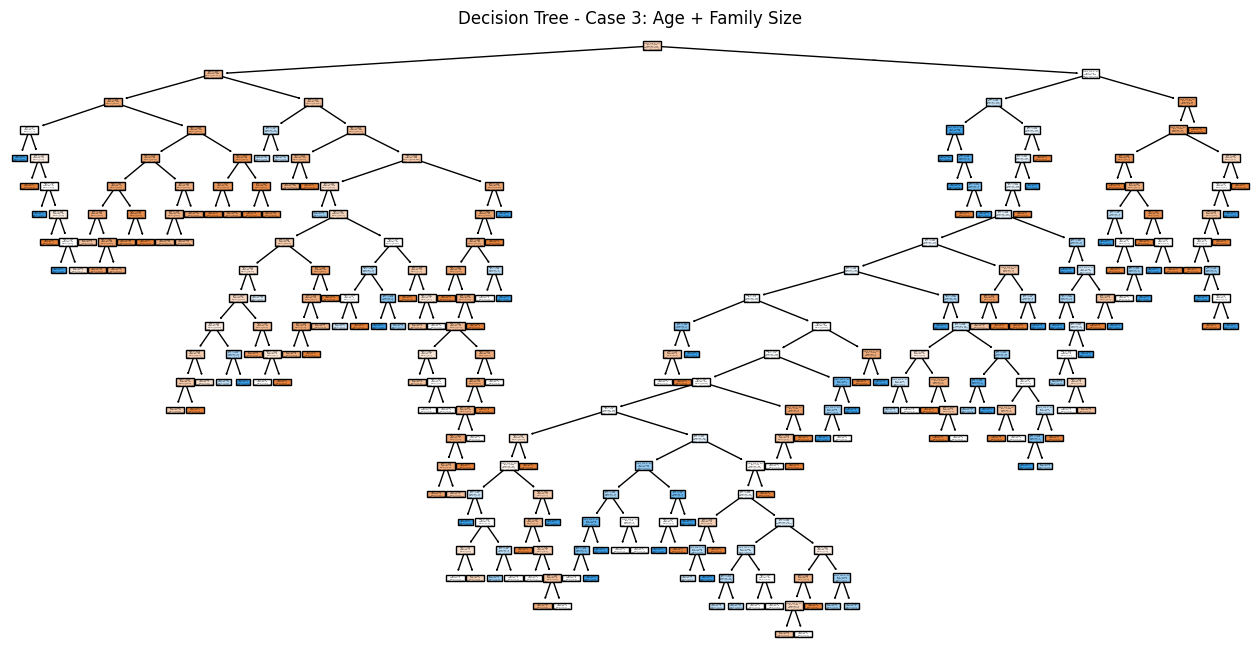

In [25]:
# Plot Decision Tree for Case 3
fig = plt.figure(figsize=(16, 8))
plot_tree(tree_model3,
          feature_names=X3.columns,
          class_names=['Not Survived', 'Survived'],
          filled=True)
plt.title("Decision Tree - Case 3: Age + Family Size")
plt.show()

# Save image
fig.savefig("tree_case3_age_family.png")

### Reflection 4

How well did the different cases perform? <br>

Overall the performance was comparable on all 3 decision tree models.  With Case 1 performing the best.  Using the weighted average f-1 score as an overall indicator of performance the range is 0.55 , 0.57 and 0.63 for Case 1 - alone.  <br>

Are there any suprising results? <br>

The recall for the true negatives was very high for Case 2 - age.  While the model did not prove to do very well for true positives.  

Which inputs worked better? Overall age and alone did not have a high correlation to survivorship resulting in low success in the models scores.  Other factors such as pclass and fare would probably be better predictors of survivorship.

## Section 5 Compare Alternative Models (Support Vector C , Neural Network)

### 5.1 Train and Evaluate the Model -- SVC

In [26]:
from sklearn.svm import SVC

# CASE 1: SVC using 'alone'
svc_model1 = SVC()
svc_model1.fit(X1_train, y1_train)
y1_svc_pred = svc_model1.predict(X1_test)
print("Results for SVC on test data (Case 1 - alone):")
print(classification_report(y1_test, y1_svc_pred))

Results for SVC on test data (Case 1 - alone):
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       110
           1       0.51      0.58      0.54        69

    accuracy                           0.63       179
   macro avg       0.61      0.62      0.61       179
weighted avg       0.64      0.63      0.63       179



In [27]:
# CASE 2: SVC using 'age'
svc_model2 = SVC()
svc_model2.fit(X2_train, y2_train)
y2_svc_pred = svc_model2.predict(X2_test)
print("Results for SVC on test data (Case 2 - age):")
print(classification_report(y2_test, y2_svc_pred))

Results for SVC on test data (Case 2 - age):
              precision    recall  f1-score   support

           0       0.63      0.98      0.77       110
           1       0.71      0.07      0.13        69

    accuracy                           0.63       179
   macro avg       0.67      0.53      0.45       179
weighted avg       0.66      0.63      0.52       179



In [28]:
# CASE 3: SVC using 'age + family size'
svc_model3 = SVC()
svc_model3.fit(X3_train, y3_train)
y3_svc_pred = svc_model3.predict(X3_test)
print("Results for SVC on test data (Case 3 - age + family size):")
print(classification_report(y3_test, y3_svc_pred))

Results for SVC on test data (Case 3 - age + family size):
              precision    recall  f1-score   support

           0       0.63      0.98      0.77       110
           1       0.71      0.07      0.13        69

    accuracy                           0.63       179
   macro avg       0.67      0.53      0.45       179
weighted avg       0.66      0.63      0.52       179



### 5.2 Visualize Support Vectors (1d Case 1 , 2d Case 3)

Case 1

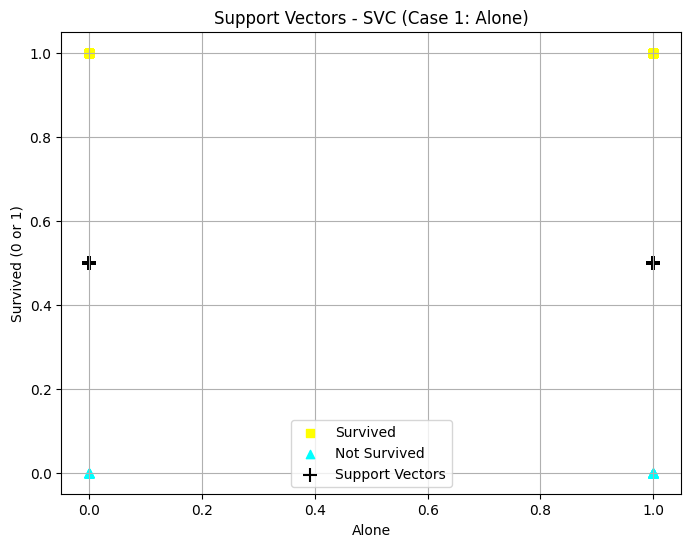

In [29]:
# Visualize support vectors for Case 1 (feature = 'alone')

# Create groups based on survival
survived_alone = X1_test.loc[y1_test == 1, 'alone']
not_survived_alone = X1_test.loc[y1_test == 0, 'alone']

# Create scatter plot for survived and not survived
plt.figure(figsize=(8, 6))

plt.scatter(survived_alone, y1_test.loc[y1_test == 1], c='yellow', marker='s', label='Survived')
plt.scatter(not_survived_alone, y1_test.loc[y1_test == 0], c='cyan', marker='^', label='Not Survived')

# Overlay support vectors
# Check if the model has support_vectors_ (it may not if it failed to converge)
if hasattr(svc_model1, 'support_vectors_'):
    # Get the X-values of the support vectors (only one feature in Case 1
    support_x = svc_model1.support_vectors_[:, 0]  # First feature (alone)
    # Plot them using a fixed Y-value (0.5) to place them between classes visually
    # We use a larger size (s=100) and a plus symbol to make them stand out
    plt.scatter(support_x, [0.5] * len(support_x), c='black', marker='+', s=100, label='Support Vectors')

# Add labels and legend
plt.xlabel('Alone')
plt.ylabel('Survived (0 or 1)')
plt.title('Support Vectors - SVC (Case 1: Alone)')
plt.legend()
plt.grid(True)
plt.show()

Case 3. Two Inputs , Two Dimensional Scatter Plot

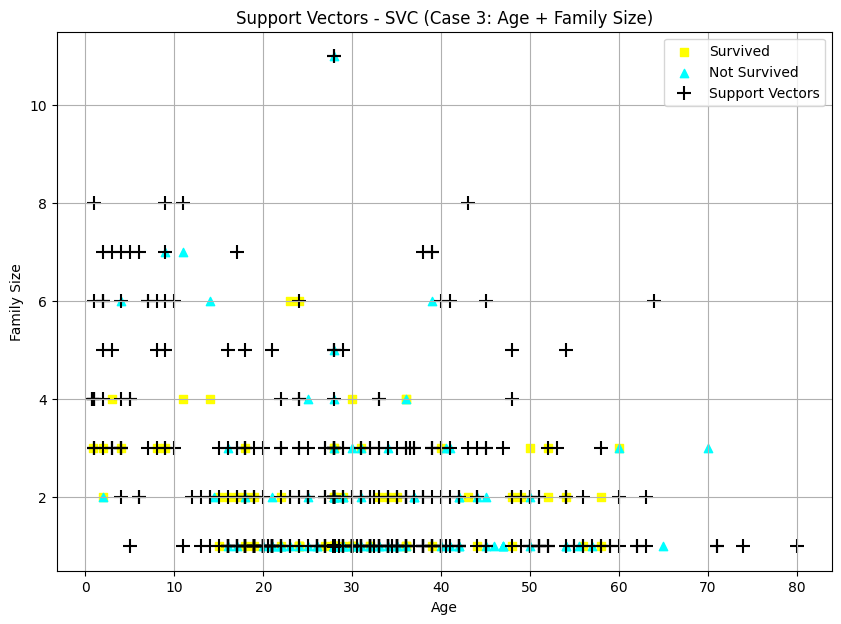

In [30]:
# Visualize support vectors for Case 3 (features = 'age', 'family_size') - more interesting (two dimensional)

# Create groups based on survival
survived = X3_test[y3_test == 1]
not_survived = X3_test[y3_test == 0]

# Create scatter plot
plt.figure(figsize=(10, 7))

# Plot survived (yellow squares)
plt.scatter(survived['age'], survived['family_size'],
            c='yellow', marker='s', label='Survived')

# Plot not survived (cyan triangles)
plt.scatter(not_survived['age'], not_survived['family_size'],
            c='cyan', marker='^', label='Not Survived')

# Overlay support vectors
if hasattr(svc_model3, 'support_vectors_'):
    support_vectors = svc_model3.support_vectors_
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1],
                c='black', marker='+', s=100, label='Support Vectors')

# Add labels, title, and legend
plt.xlabel('Age')
plt.ylabel('Family Size')
plt.title('Support Vectors - SVC (Case 3: Age + Family Size)')
plt.legend()
plt.grid(True)
plt.show()

### Train and Evaluate Model (Neural Network on Case 3)

In [31]:
# Train NN for Case 3 (age + family_size)
nn_model3 = MLPClassifier(
    hidden_layer_sizes=(50, 25, 10),
    solver='lbfgs',
    max_iter=1000,
    random_state=42
)

nn_model3.fit(X3_train, y3_train)


,hidden_layer_sizes,"(50, ...)"
,activation,'relu'
,solver,'lbfgs'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,1000
,shuffle,True
,random_state,42


In [32]:
# Predict on test data (Case 3)
y3_nn_pred = nn_model3.predict(X3_test)

# Print classification report
print("Results for Neural Network on test data (Case 3 - age + family_size):")
print(classification_report(y3_test, y3_nn_pred))

Results for Neural Network on test data (Case 3 - age + family_size):
              precision    recall  f1-score   support

           0       0.68      0.89      0.77       110
           1       0.65      0.32      0.43        69

    accuracy                           0.67       179
   macro avg       0.66      0.60      0.60       179
weighted avg       0.66      0.67      0.64       179



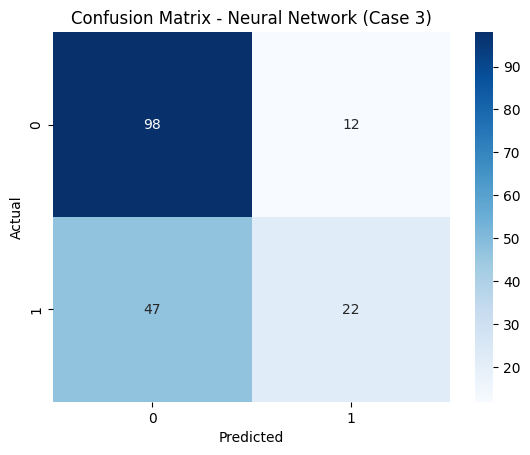

In [33]:
# Create confusion matrix
cm_nn3 = confusion_matrix(y3_test, y3_nn_pred)

# Plot heatmap
sns.heatmap(cm_nn3, annot=True, cmap='Blues')
plt.title('Confusion Matrix - Neural Network (Case 3)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### 5.4 Visualize (Neural Network on Case 3)

In [34]:
from matplotlib.colors import ListedColormap

c:\Users\Owner\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


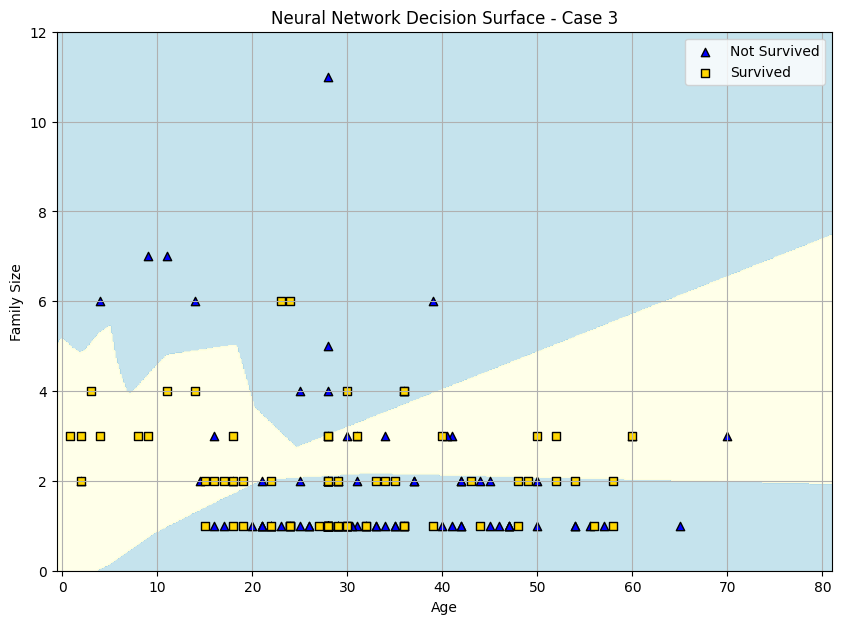

In [35]:
# Get the range of our two features - use padding to enhance appearance

padding = 1
x_min, x_max = X3['age'].min() - padding, X3['age'].max() + padding
y_min, y_max = X3['family_size'].min() - padding, X3['family_size'].max() + padding

 

# Create a meshgrid (all combinations of age and family_size)

# A grid of values covering the entire input space
# np.linspace(start, stop, num) generates evenly spaced values (like a ruler)
# Here, we create 500 points between min and max for each axis
# np.meshgrid creates a coordinate grid from the two arrays

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                                    np.linspace(y_min, y_max, 500))

 # Flatten the grid arrays and prepare them for prediction
# np.c_ stacks the flattened xx and yy into coordinate pairs
# .ravel() flattens a 2D array into 1D (required by the model for prediction)

Z = nn_model3.predict(np.c_[xx.ravel(), yy.ravel()])

# Reshape the predicted results to match the original 2D grid shape
Z = Z.reshape(xx.shape)

 

# Plot the decision surface (background) showing predicted survival zones

 # Blue for 0, yellow for 1 - change this up as you like
plt.figure(figsize=(10, 7))
cmap_background = ListedColormap(['lightblue', 'lightyellow'])

plt.contourf(xx, yy, Z, cmap=cmap_background, alpha=0.7)

 

# Overlay the actual test data points for visual comparison
# Plot passengers who did NOT survive (0) as blue triangles
plt.scatter(X3_test['age'][y3_test == 0],
            X3_test['family_size'][y3_test == 0],
            c='blue', marker='^', edgecolor='k', label='Not Survived')

# Plot passengers who DID survive (1) as gold squares
plt.scatter(X3_test['age'][y3_test == 1],
            X3_test['family_size'][y3_test == 1],
            c='gold', marker='s', edgecolor='k', label='Survived')

# Add axis labels, title, legend, and grid
plt.xlabel('Age')
plt.ylabel('Family Size')
plt.title('Neural Network Decision Surface - Case 3')
plt.legend()
plt.grid(True)
plt.show()

### Reflection 5

How well did each of these models/cases perform? <br>

Using the weighted average f1 score as the overall indicator of success, The SVC performed very similar to the Decision Tree classifier. Also Case 1 - alone for the SVC model outperformed the other features.  The Neural Network model on Case 3 performed teh best <br>

Are there any suprising results or insights? <br>

The resuls of Case 3 Neural Network were suprising, because using other models the Case 3 did not do very well.  It shows that the model can have just as much of an impact on performance as choosing the correct features<br>

Why might one model outperform the others? I honestly don't know why the Neural Network performed better, but predicted the most correct values out of all of the models.  The SVC performed less well than the Decision Tree most likely due to the low correlation between the survivorship and the features selected.  It may perfom better given more data or using different features. However all models would probably perform better if the features were p_class or fare.



## Section 6 Final thoughts and Insights

1. Summarize Findings - use a table to summarize<br>

Model Type	Case	Features Used	Accuracy	Precision	Recall	F1-Score<br>
Decision Tree	Case 1	Alone	63	64	63	63<br>
----------------Case 2 	Age	61	58	61	55<br>
----------------Case 3	Age + Family Size	59	57	59	57<br>
SMV (RBF Kernel)	Case 1	Alone	63	64	63	63<br>
----------------Case 2 	Age	63	66	63	63<br>
----------------Case 3	Age + Family Size	63	66	63	52<br>
Neural Network	Case  1	Alone				<br>
----------------Case 2 	Age				<br>
----------------Case 3	Age + Family Size	67	66	66	64<br>


2. Discuss Challenges Faced<br>

The overall challenge in picking a classifier model would be in maximizing the results by picking the best features and the best model.  Both will play a factor in producing good results<br>

3. Next steps to gain more insights and/or to explore classification models. <br>

Explore other features and other models to get more accurate predictions.  Perhaps using features that have a higher correlation to survivor rating such as p_class and fare. 
